# <strong>Multi Class Classification Using Keras:</strong>

In [0]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
# Directory Structure:

'''
Dataset/

        train/
        
              category 1/
              
                       img1.png
                       img2.png
                       ...
                       
              category 2/
              
                       img1.png
                       img2.png
                       ...
                
              category 3/
              
                       img1.png
                       img2.png
                       ...
                       
              category 4/
              
                       img1.png
                       img2.png
                       ...

         test/
         
              category 1/
              
                       img1.png
                       img2.png
                       ...
                       
              category 2/
              
                       img1.png
                       img2.png
                       ...
                
              category 3/
              
                       img1.png
                       img2.png
                       ...
                       
              category 4/
              
                       img1.png
                       img2.png
                       ...   
                                      
'''

# Total samples in train set : 440 [Categories: 102, 107, 112, 119]
# Total samples in test set  : 30  [Categories: 5, 9, 11, 5]

'\nDataset/\n\n        train/\n        \n              category 1/\n              \n                       img1.png\n                       img2.png\n                       ...\n                       \n              category 2/\n              \n                       img1.png\n                       img2.png\n                       ...\n                \n              category 3/\n              \n                       img1.png\n                       img2.png\n                       ...\n                       \n              category 4/\n              \n                       img1.png\n                       img2.png\n                       ...\n\n         test/\n         \n              category 1/\n              \n                       img1.png\n                       img2.png\n                       ...\n                       \n              category 2/\n              \n                       img1.png\n                       img2.png\n                       ...\n               

In [0]:
# Import packages
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [0]:
# Print number of images present in Train and Test set
train_images_count = len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/train/category 1')) + \
                     len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/train/category 2')) + \
                     len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/train/category 3')) + \
                     len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/train/category 4'))

test_images_count = len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/test/category 1')) + \
                    len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/test/category 2')) + \
                    len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/test/category 3')) + \
                    len(os.listdir('./My Drive/Busigence/Image_2/Input/Dataset/test/category 4'))


print(train_images_count)
print(test_images_count)

440
30


In [0]:
# dimensions of our images.
img_width, img_height = 800, 800

# Path to save the trained weights (model)
top_model_weights_path = './Images/Output/bottleneck_fc_model.h5'

# Path to train and test directories
train_data_dir = './Images/Input/Dataset/train'
validation_data_dir = './Images/Input/Dataset/test'

# Number of train and test images in the dataset
nb_train_samples = train_images_count
nb_validation_samples = test_images_count
epochs = 50
batch_size = 10

train_categories_sample_size = [102, 107, 112, 119]
test_categories_sample_size = [5, 9, 11, 5]
one_hot_val = [0,1,2,3]

In [0]:
# Function to convert and save train and test images to numpy arrays
def save_bottleneck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights=None)

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    
    bottleneck_features_train = model.predict_generator(
                                generator, nb_train_samples // batch_size)
    
    np.save(open('./Images/Output/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)
    print("Saved training images as .npy files")
    
    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
                                     generator, nb_validation_samples // batch_size)
    np.save(open('./Images/Output/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)
    print("Saved testing images as .npy files")
    
save_bottleneck_features()

W0818 11:44:54.149414 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 11:44:54.172227 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 11:44:54.175867 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 11:44:54.209740 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 11:44:54.487055 139929989732224 deprecation_wrapp

Found 440 images belonging to 4 classes.


W0818 11:44:54.775104 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



Saved training images as .npy files
Found 30 images belonging to 4 classes.
Saved testing images as .npy files


In [0]:
# Encoding train and test labels
train_labels_encode, test_labels_encode = [],  []
for i in range(len(one_hot_val)):
    train_labels_encode.extend([one_hot_val[i]] * train_categories_sample_size[i])
    test_labels_encode.extend([one_hot_val[i]] * test_categories_sample_size[i])
train_labels_encode = to_categorical(train_labels_encode)
test_labels_encode = to_categorical(test_labels_encode)

# Load numpy values of train set
train_data = np.load(open('./Images/Output/bottleneck_features_train.npy', 'rb'))
train_labels = train_labels_encode

# Load numpy values of test set
validation_data = np.load(open('./Images/Output/bottleneck_features_validation.npy', 'rb'))
validation_labels = test_labels_encode

# Declare a sequential model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

W0818 11:47:00.952584 139929989732224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0818 11:47:00.985032 139929989732224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 11:47:01.079891 139929989732224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               81920256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 81,921,284
Trainable params: 81,921,284
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Model training
history = model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)

Train on 440 samples, validate on 30 samples
Epoch 1/50
440/440 [==============================] - 5s 12ms/step - loss: 0.5338 - acc: 0.7466 - val_loss: 0.4350 - val_acc: 0.7667
Epoch 2/50
440/440 [==============================] - 4s 9ms/step - loss: 0.4118 - acc: 0.8040 - val_loss: 0.3382 - val_acc: 0.9000
Epoch 3/50
440/440 [==============================] - 4s 9ms/step - loss: 0.3464 - acc: 0.8545 - val_loss: 0.2893 - val_acc: 0.8833
Epoch 4/50
440/440 [==============================] - 4s 9ms/step - loss: 0.3147 - acc: 0.8710 - val_loss: 0.2411 - val_acc: 0.9000
Epoch 5/50
440/440 [==============================] - 4s 9ms/step - loss: 0.2725 - acc: 0.8932 - val_loss: 0.1786 - val_acc: 0.9833
Epoch 6/50
440/440 [==============================] - 4s 9ms/step - loss: 0.2314 - acc: 0.9159 - val_loss: 0.1417 - val_acc: 1.0000
Epoch 7/50
440/440 [==============================] - 4s 9ms/step - loss: 0.2138 - acc: 0.9216 - val_loss: 0.1374 - val_acc: 0.9667
Epoch 8/50
440/440 [==========

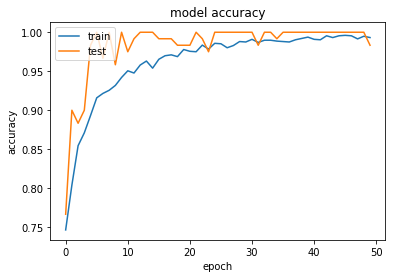

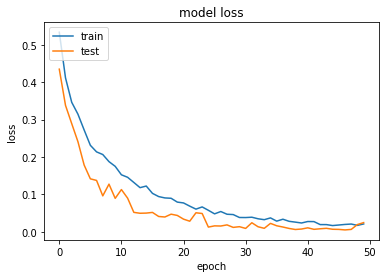

In [0]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summary
<ul>
  <li> A dataset was provided in the <strong>Input </strong> directory where there are 440 images provided for training and 30 images for testing.</li>
  <li> For building a CNN image classifier on top of the dataset, transfer learning was applied using <strong>VGG16</strong> architecture as its was proven to yeild high accuracies in image classification. </li>
  <li>Perfomance of the model was found to be impressive on both train and test sets.  </li>
  <li> Model performance on test set was found to be more when compared to training set, which is a pretty impressive case.